# Machine Learning

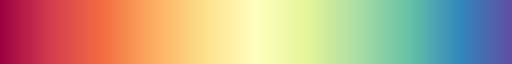

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

sns.set_theme('notebook')
sns.color_palette("Spectral", as_cmap=True)

In [32]:
df = pd.read_csv('./data/df_sistema_electrico_ML.csv', index_col='Date')
df

,generacion_sistema_daily,perdidas_sistema_daily,volumen_util_energia_sistema_daily,emisiones_sistema_daily,aportes_energia_sistema_daily,demanda_real_sistema_daily,exportaciones_sistema_daily,importaciones_sistema_daily,precio_bolsa_sistema_daily,comsumo_combustible_daily
Date,,,,,,,,,,
2010-01-01,115.419084,2.079353,10006.614779,0.000000,45.6161,113.361581,4.53691,21.84964,120.501228,727.881567
2010-01-02,127.681195,2.226467,9995.146812,0.000000,43.0971,125.471807,12.55138,17.07939,118.495340,743.929011
2010-01-03,123.637778,2.509638,9992.677303,0.000000,43.4004,121.145173,9.11835,17.03269,121.160145,749.063827
2010-01-04,145.957459,2.032915,9965.341214,0.000000,40.4104,143.931719,1513.37010,7.17460,123.962937,772.736247
2010-01-05,152.148029,2.278902,9926.759570,0.000000,41.1906,149.869128,3057.65195,0.00000,120.666437,767.491641
...,...,...,...,...,...,...,...,...,...,...
2024-04-26,224.604764,3.468542,5399.083900,81.390038,175.1971,221.136223,0.00000,0.00000,215.201028,1077.648732
2024-04-27,217.165537,3.317766,5454.064900,72.221148,190.9257,213.847772,0.00000,0.00000,160.221522,959.209242
2024-04-28,194.188787,2.880163,5557.993200,65.899834,206.1877,191.312939,12.43822,4.31501,106.818940,864.909070


## Agrupamiento

In [33]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

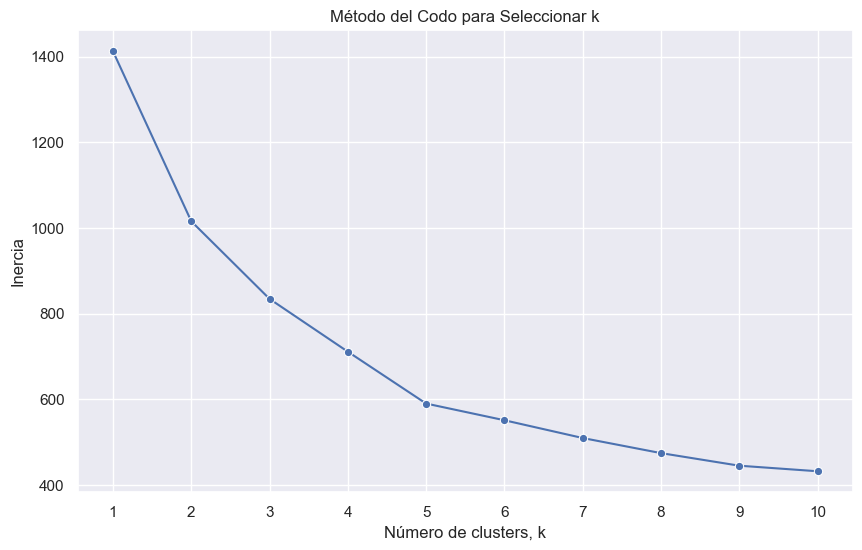

In [34]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# Convertir los datos escalados en un DataFrame de pandas
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)

# Lista para almacenar la inercia para cada k
inertia = []

# Probar con diferentes valores de k
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=inertia, marker='o', color='b')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [35]:
# Aplicar K-means con el número óptimo de clusters
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)

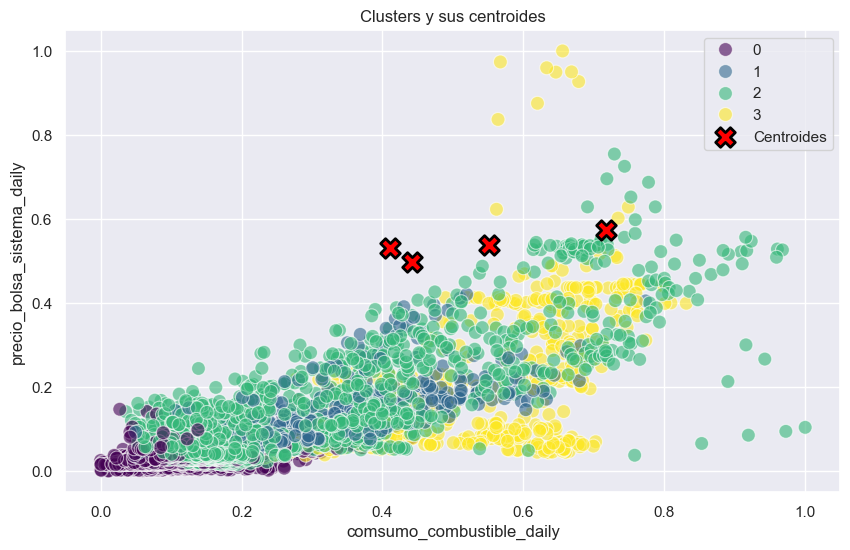

In [36]:
# Añadir la columna de clusters al DataFrame
df_scaled['Cluster'] = y_kmeans

# Visualizar los clusters y los centroides usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='comsumo_combustible_daily', y='precio_bolsa_sistema_daily', hue='Cluster', palette='viridis', s=100, alpha=0.6, edgecolor='w')

# Añadir los centroides al gráfico
centroids = kmeans.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=200, color='red', marker='X', edgecolor='black', linewidth=2, label='Centroides')

plt.title('Clusters y sus centroides')
plt.show()

In [37]:


fig2 = px.scatter_3d(df_scaled.sample(frac=0.1), x='generacion_sistema_daily', 
                     y='aportes_energia_sistema_daily', 
                     z='comsumo_combustible_daily', 
                     color='precio_bolsa_sistema_daily',
                     width=1200, height=800)
fig2.show()

## Reducción de Dimesionalidad

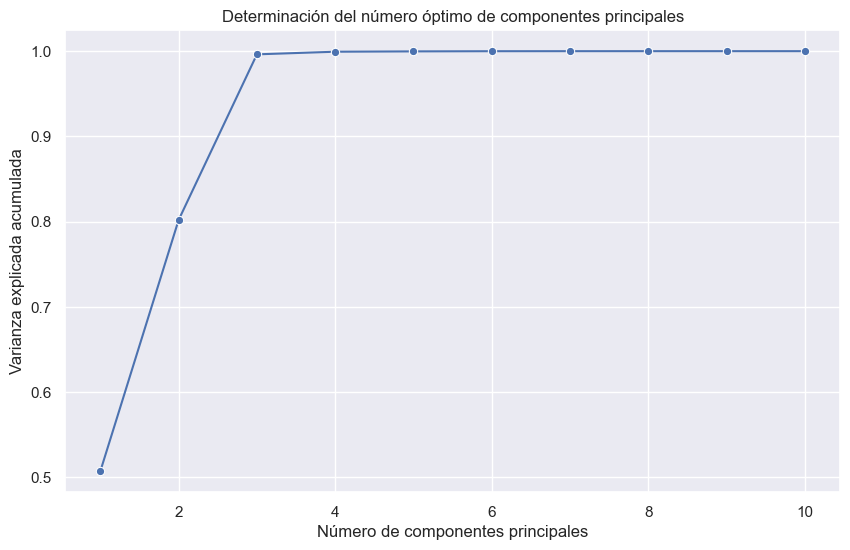

In [38]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
# Aplicar PCA sin limitar el número de componentes
pca = PCA()
pca.fit(df)

# Varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(varianza_explicada_acumulada) + 1), y=varianza_explicada_acumulada, marker='o', color='b')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Determinación del número óptimo de componentes principales')
plt.grid(True)
plt.show()

In [39]:
# Aplicar PCA con 3 componentes principales
pca = PCA(n_components=3)
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_pca = pca.fit_transform(X_scaled)

# Convertir las componentes principales en un DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['precio_bolsa_sistema_daily'] = df['precio_bolsa_sistema_daily'].values
df_pca


,PC1,PC2,PC3,precio_bolsa_sistema_daily
0,-3.172644,-3.377705,0.546042,120.501228
1,-2.569469,-3.108363,0.604295,118.495340
2,-2.627437,-3.004696,0.672469,121.160145
3,-1.806268,-2.943160,0.940209,123.962937
4,-1.480581,-2.576436,1.311145,120.666437
...,...,...,...,...
5229,4.578216,-1.768336,0.053649,215.201028
5230,3.661362,-1.513795,-0.148489,160.221522
5231,2.092198,-1.799436,-0.395815,106.818940
5232,2.510541,-0.188264,-0.764717,136.110230


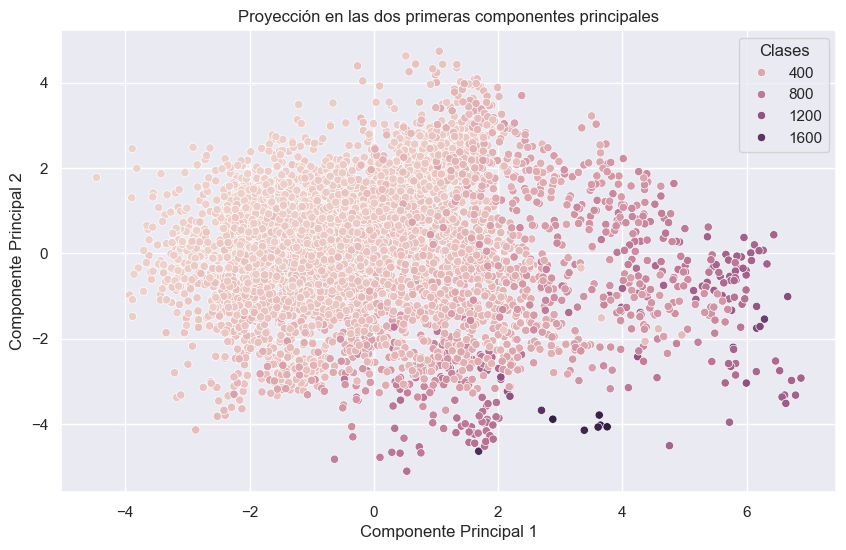

In [40]:
# Visualizar las dos primeras componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='precio_bolsa_sistema_daily')
plt.title('Proyección en las dos primeras componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clases')
plt.show()

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = px.scatter_3d(df_pca.sample(frac=0.1), x='PC1', 
                     y='PC2', 
                     z='PC3', 
                     color='precio_bolsa_sistema_daily',
                     width=1200, height=800)
fig2.show()